1.导入相关的包

In [151]:
#数据处理与清洗包
import numpy as np
import pandas as pd

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt

# 机器学习算法
from sklearn.linear_model import LogisticRegression,Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


1. 加载数据集

In [152]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
# 合并数据
combine = [train_df,test_df]

2. 描述性统计分析

In [153]:
# 获取所有特征名
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [154]:
# 预览数据
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


哪些特征包含缺失值（空值，null,nan）？

 在训练集， 缺失值数目 Cabin > Age > Embarked

 在测试集中，缺失值数目 Cabin > Age > Fare

各种特征的数据类型是什么？

 在训练集中，7个特征是整数型或浮点型， 5个特征是字符串型；

 在测试集中，6个特征是整数型或浮点型，5个特征是字符串型。


In [156]:
print(train_df.isnull().sum())
print('_'*40)
test_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [157]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

样本中数值特征的分布是什么？

  样本总数为891人，约占泰坦尼克号上实际乘客人数（2224人）的40%

  survived是具有0或1值的二分类变量，并且大约38%的样本存货，代表实际存活率32%

  大多数乘客（>50%）的票价等级是三等票

  年龄在65-80 岁之间的老年乘客很少(<1%)

  近30%的乘客有兄弟姐妹或配偶一同登机；

  大多数乘客（>75%）没有与父母或孩子一起旅行

  票价差异很大，少数乘客(<1%)支付高达512美元



In [158]:
round(train_df.describe(percentiles=[.5,.6,.7,.75,.8,.9,.99]),2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
60%,535.00,0.00,3.00,31.80,0.00,0.00,21.68
70%,624.00,1.00,3.00,36.00,1.00,0.00,27.00
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
80%,713.00,1.00,3.00,41.00,1.00,1.00,39.69
90%,802.00,1.00,3.00,50.00,1.00,2.00,77.96


样本中分类特征的分布是什么？

名称在数据集中是唯一的（count=unique=891)

性别变量有两个可能的值， 男性占65% (top=male , freq=577/891)

票号具有高比例（22%）的重复值（unique=681);

客舱号在样本中也具有较多重复项， 说明存在几名乘客共用一个小舱的现象

登船港口有三个可能的值，大多数乘客是S口



In [159]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


4、基于数据分析的假设
我们想知道每个特征与幸存Survived的相关性如何，以便后期建模。事先可以这样假设：

Age年龄特征肯定与幸存有关

Embarked 登船港口可能与幸存或其他特征相关

Ticket 票号包含较高重复率（22%）， 并且和幸存之间可能没有相关性，因此可能会从我们的分析中删除

Cabin 客舱号可能被丢弃，因为它在训练和测试集中缺失值过多（数据高度不完整）

PassengerId 乘客编号可能会从训练集中删除，因为它对幸存没有作用

Name 名字特征比较不规范， 可能也对幸存没有直接贡献， 因此可能被丢弃

通过旋转特征进行分析

Pclass 观察到 Pclass=1 和 Survived 之间有显著的相关性，因此在模型中应包含此特征

Sex 女性的存活率非常高达74% ， 因此在模型中应包含性别特征

SibSp 和 Parch 这两个特征对于某些值与Survived具有零相关性， 最好从单独的特征中派生一个特征或一组特征，使得与Survived有显著相关性



In [160]:
# 针对Pclass 和 Survived进行分类汇总
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)
# pd.Dataframe(train_df.groupby('Pclass',as_index=False)['Survived'].mean()).sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [161]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [162]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [163]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


5、可视化数据分析

分析数值特征Age与Survived相关性

首先了解数值特征Age与我们的解决方案目标（Survived）之间的相关性。直方图对于分析连续数值变量很有用

婴儿（年龄<=4） 的存活率很高

最年长的乘客（年龄=80）幸存下来；

大部分15-25 岁的人无法生存

大多数乘客的年龄在15-35岁之间

这个简单的分析证实了后续工作我们应该：

在模型训练中考虑年龄特征 Age

完成年龄特征的缺失值处理

捆绑年龄组

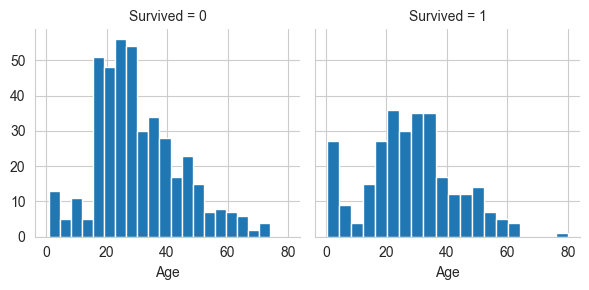

In [164]:
g = sns.FacetGrid(train_df,col='Survived') # FacetGrid(data,row,col,hue,height,aspect,palette,...)
g.map(plt.hist,'Age',bins=20)

分析有序分类特征 Pclass 与 Survived 相关性

 Pclass=3 有大多数乘客， 但大多数没有幸存

 Pclass=2 和 Pclass=3 的婴儿乘客大多幸存下来；

 Pclass=1 中的大多数乘客幸存下来

 Pclass 因乘客年龄分布而异

综上分析，应该将Pclass纳入模型训练之中

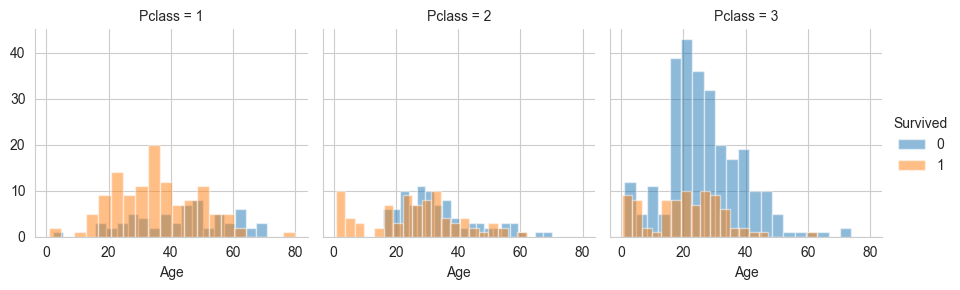

In [165]:
# grid = sns.FaceGrid(train_df,col = 'Survived' , row='Pclass',size=2.5,aspect=1.6)
grid = sns.FacetGrid(train_df,col='Pclass',hue='Survived')
grid.map(plt.hist,'Age', alpha=0.5,bins=20)
grid.add_legend(); # 添加图例

分析无序分类特征Embarked 与 Survived 相关性

 Embarked=S 和 Q 中，女性乘客的存活率远高于男性，Embarked = C 中， 男性的存活率较高。 这可能是Embarked 和 Sex 相关，进而造成Embarked与Survived间接相关。

对于同一票价等级和同一性别， 不同登船港口的存活率不同。

综上分析，在模型训练中应该：添加Sex 和 Embarked 特征

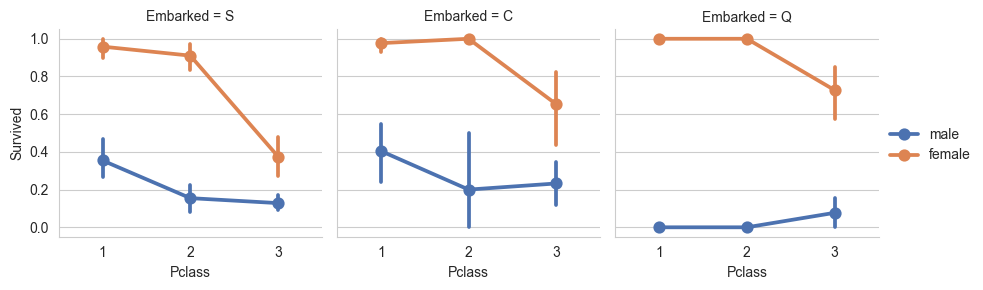

In [166]:
grid = sns.FacetGrid(train_df,col='Embarked')
grid.map(sns.pointplot,'Pclass','Survived','Sex',order=[1,2,3],hue_order=['male','female'],palette='deep')
grid.add_legend()

分析数值特征 Fare 与 Survived 相关性
将分类特征（具有非数值）和数字特征相关联，可以考虑将Embarked（分类非数值），Fare(连续数值），与Survived(二分类数值）相关联

支付更高票价的乘客能够更好地幸存，并且幸存率具有较明显地票价区间性：

不同的登船港口有不同的存活率

因此，应该考虑捆绑票价特征Fare, 并纳入模型训练中

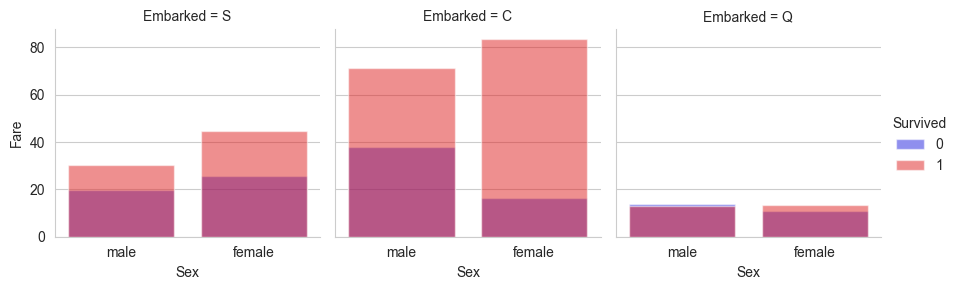

In [167]:
grid = sns.FacetGrid(train_df,col='Embarked',hue= 'Survived',palette={0:'b', 1: 'r'})
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, errorbar=None,order=['male','female'])
grid.add_legend()

6、整理，清洗数据

删除无用特征Ticket和Cabin

注意一起删除训练集和测试集合的无用特征

In [168]:
print("Before",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine =[train_df,test_df]

"After", train_df.shape,test_df.shape,combine[0].shape,combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

从现有特征中提取新特征

在删除Name和PassengerId特征之前，分析是否可以设计Name特征来提取头衔Title，并测试Title和Survived之间的相关性

使用正则表达式提取title特征，正则表达式（\w+\.)匹配Name特征中以点字符结尾的第一个单词，expand=False返回一个DataFrame

当绘制Title、 Age 和Survived 时，注意到以下观察结果：
  大多数标题准确地划分了年龄组，例如： Master Title 的平均Age是5岁，某些头衔大多幸存下来（Mme、Lady、Sir）或没有幸存下来（Don、Rev、Jonkheer)

因此，决定保留新的Title特征用于模型训练


In [169]:
train_df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [170]:
# 使用正则表达式
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(r'([A-Za-z]+)\.',expand=False)

pd.crosstab(train_df['Title'],train_df['Sex']).sort_values(by='female',ascending=False)

Sex,female,male
Title,,
Miss,182,0
Mrs,125,0
Mlle,2,0
Mme,1,0
Countess,1,0
Lady,1,0
Dr,1,6
Ms,1,0
Capt,0,1


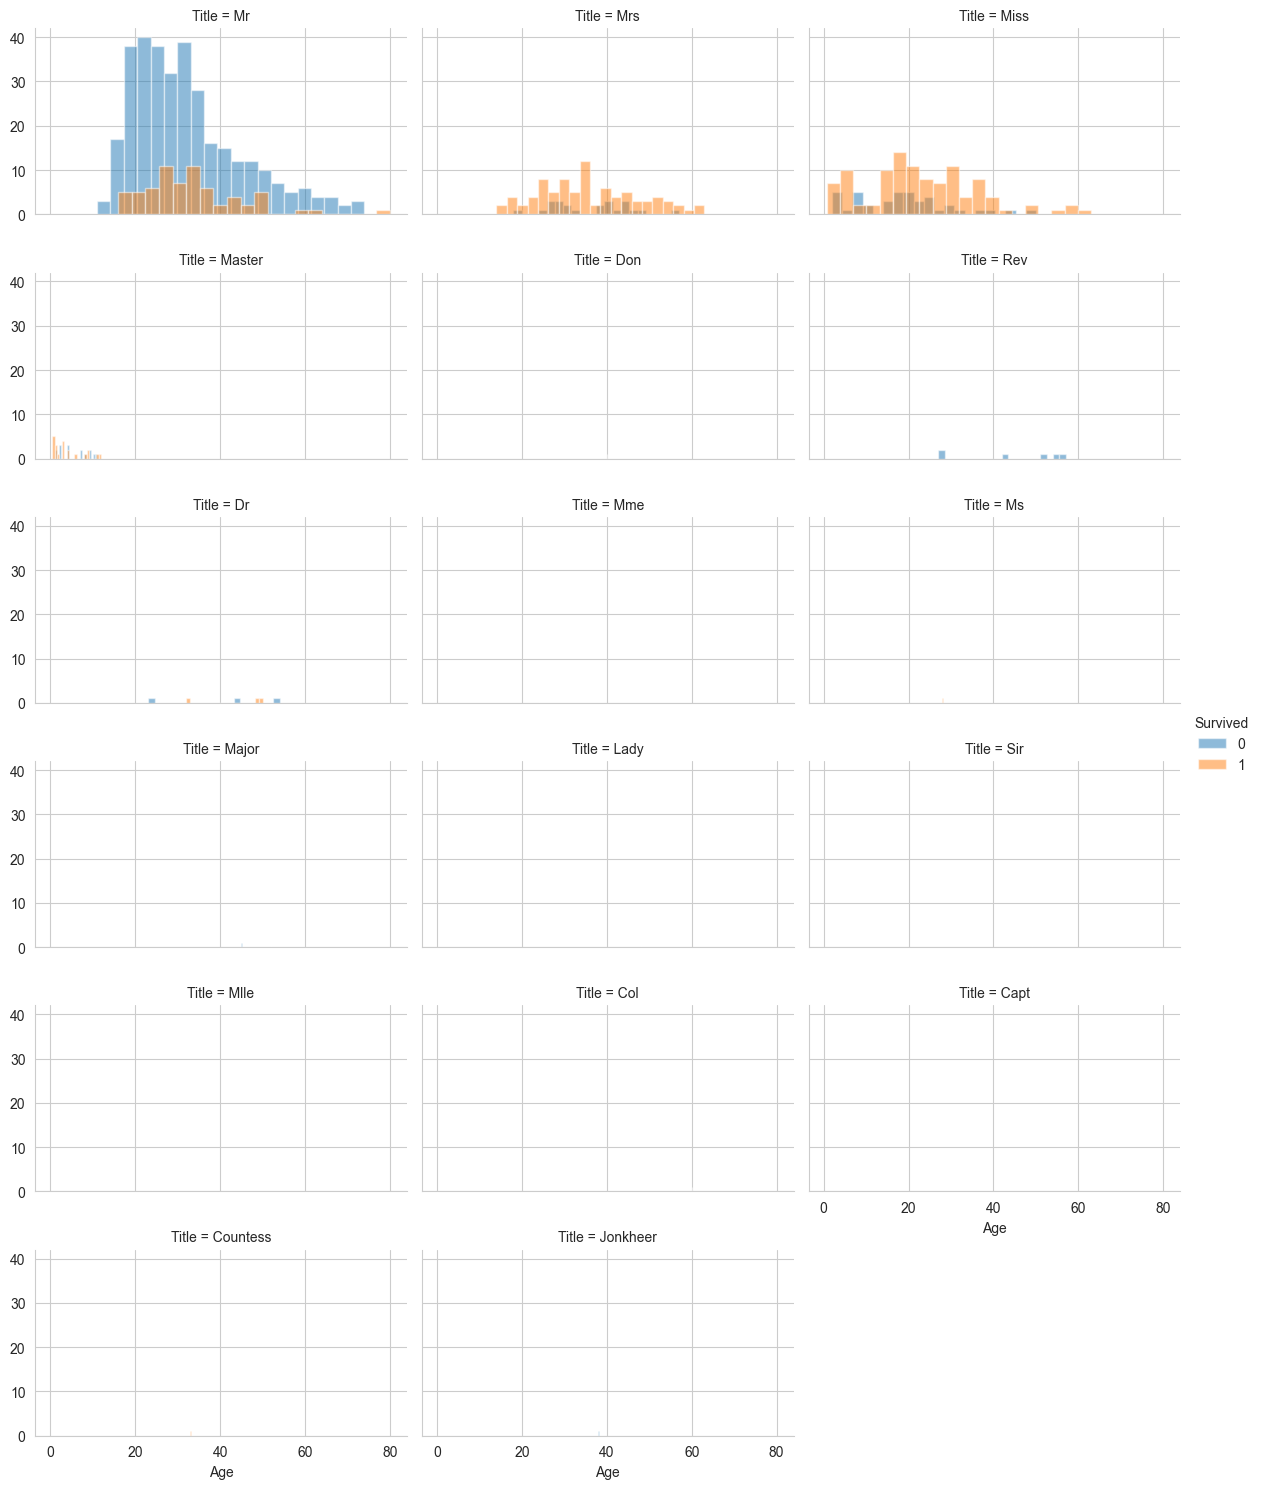

In [171]:
grid = sns.FacetGrid(train_df, col='Title', hue='Survived',col_wrap=3,height=2.5,aspect=1.6)
# grid = sns.FacetGrid(train_df,col='Title',hue='Survived')
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

In [172]:
# 可以使用更常见的名称替换许多标题或将它们归类为稀有
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [173]:
# 将分类标题转换为序数
title_mapping= {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [174]:
# 现在可以从训练和测试数据集中删除Name特征以及训练集中的PassengerId特征
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine = [train_df,test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

转换性别特征Sex

In [175]:
# 转换分类特征Sex
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


填补年龄特征Age的缺失值

1，使用其他相关特征，注意到Age,Sex 和Pclass之间的相关性，使用Pclass和Sex特征组合集的Age中值预测Age值；

2，基于1， 使用基于Pclass和Sex组合集的均值和标准差之间的随机数来预测Age值；

3，引入随机噪声


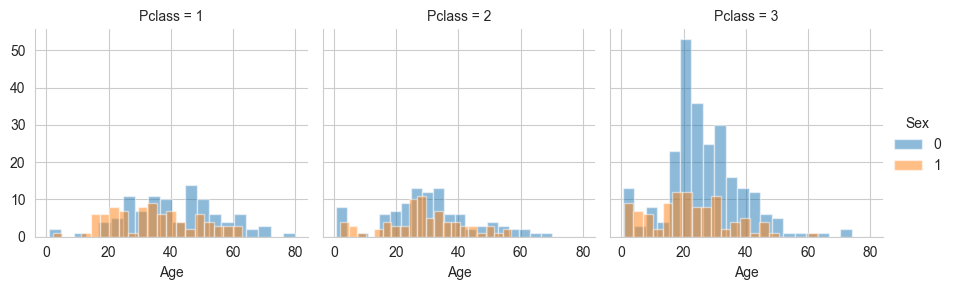

In [176]:
# 绘制Age,Pclass,Sex复合直方图
#grid = sns.FacetGrid(train_df,row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid = sns.FacetGrid(train_df,col='Pclass',hue='Sex')
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()


In [177]:
# 创建空数组
guess_ages = np.zeros((2,3))
guess_ages

# 遍历 Sex (0 或 1)和 Pclass(1,2,3)来计算六种组合的Age猜测值
for dataset in combine:
    # 第一个for循环计算每一个分组的Age预测值
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std,age_mean + age_std)

            age_guess = guess_df.median()

            # 将随机年龄浮点数转换为最接近的0.5年龄（四舍五入）
            guess_ages[i,j] = int(age_guess/0.5 + 0.5)*0.5

    # 第二个for循环对空值进行赋值
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [178]:
# 创建年龄段，并确定其与Survived的相关性
# 一般在建立分类模型时，需要对连续变量离散化，特征离散化后，模型会更稳定，降低了模型过拟合的风险
train_df['AgeBand'] = pd.cut(train_df['Age'],5) # 将年龄分割为5段，等距分箱
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False,observed=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [179]:
# 将这些年龄区间替换为序数
for dataset in combine:
    dataset.loc[dataset['Age'] <=16,'Age'] =0
    dataset.loc[(dataset['Age'] >16) & (dataset['Age'] <=32),'Age'] = 1
    dataset.loc[(dataset['Age'] >32) & (dataset['Age'] <=48),'Age'] = 2
    dataset.loc[(dataset['Age'] >48) & (dataset['Age'] <=64),'Age'] = 3
    dataset.loc[dataset['Age'] > 64,'Age'] = 4
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"
5,0,3,0,1,0,0,8.4583,Q,1,"(16.0, 32.0]"
6,0,1,0,3,0,0,51.8625,S,1,"(48.0, 64.0]"
7,0,3,0,0,3,1,21.0750,S,4,"(-0.08, 16.0]"
8,1,3,1,1,0,2,11.1333,S,3,"(16.0, 32.0]"
9,1,2,1,0,1,0,30.0708,C,3,"(-0.08, 16.0]"


In [180]:
train_df = train_df.drop(['AgeBand'],axis=1) #删除训练集中的AgeBand特征
combine = [train_df,test_df]
train_df.head()
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,8.0500,S,1
414,1306,1,1,2,0,0,108.9000,C,5
415,1307,3,0,2,0,0,7.2500,S,1
416,1308,3,0,1,0,0,8.0500,S,1


结合SibSp和Parch特征创建一个新特征FamilySize,意为包括兄弟姐妹，配偶，父母，孩子和自己的所有家人数量


In [181]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']+1
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


创建一个新特征IsAlone,取值为0表示一个人，取1表示不是1个人


In [182]:
# 创建新特征IsAlone
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1,'IsAlone']=1

train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


舍弃Parch,SibSp和 Family特征，转而支持IsAlone, 因为IsAlone更能反映其与Survived的相关性


In [183]:
train_df = train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine = [train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


同样，我们可以创建一个新特征Age*Pclass，以此来结合Age和Pclass变量


In [184]:
# 创建Age*Pclass特征以此用来结合Age和Pclass变量
for dataset in combine:
    dataset['Age*Pclass']= dataset.Age * dataset.Pclass

train_df.loc[:,['Age*Pclass','Age','Pclass']].head(10)
train_df[['Age*Pclass','Survived']].groupby(['Age*Pclass'],as_index=False).mean()

,Age*Pclass,Survived
0,0,0.550000
1,1,0.728814
2,2,0.520408
3,3,0.277487
4,4,0.415094
5,6,0.149425
6,8,0.000000
7,9,0.111111
8,12,0.000000


填补分类特征Embarked

登船港口特征，有三种可能的取值S,Q,C.仅训练数据集有两个缺失值，采用众数填补缺失值


In [185]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [186]:
# 同样转换分类特征为序数
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

train_df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


对票价Fare进行分箱并替换为序数


In [187]:
# 测试集中Fare有一个缺失值，用中位数进行填补
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].dropna().median())
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*Pclass     0
dtype: int64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

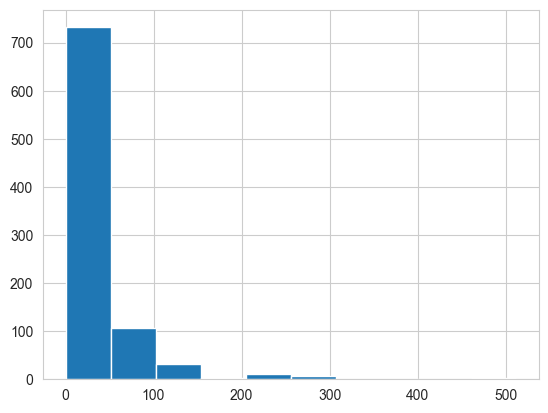

In [188]:
plt.hist(train_df['Fare'])

In [189]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False,observed=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [190]:
for dataset in combine:
    dataset.loc[(dataset['Fare'] <= 7.91),'Fare']=0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454),'Fare'] =1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31),'Fare'] =2
    dataset.loc[(dataset['Fare'] > 31),'Fare']=3

train_df = train_df.drop(['FareBand'],axis=1)
combine = [train_df,test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0.0,0,1,0,3
1,1,1,1,2,3.0,1,3,0,2
2,1,3,1,1,1.0,0,2,1,3
3,1,1,1,2,3.0,0,3,0,2
4,0,3,0,2,1.0,0,1,1,6
5,0,3,0,1,1.0,2,1,1,3
6,0,1,0,3,3.0,0,1,1,3
7,0,3,0,0,2.0,0,4,0,0
8,1,3,1,1,1.0,0,3,0,3
9,1,2,1,0,2.0,1,3,0,0


In [191]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,0.0,2,1,1,6
1,893,3,1,2,0.0,0,3,0,6
2,894,2,0,3,1.0,2,1,1,6
3,895,3,0,1,1.0,0,1,1,3
4,896,3,1,1,1.0,0,3,0,3
5,897,3,0,0,1.0,0,1,1,0
6,898,3,1,1,0.0,2,2,1,3
7,899,2,0,1,2.0,0,1,0,2
8,900,3,1,1,0.0,1,3,1,3
9,901,3,0,1,2.0,0,1,0,3


7,构建模型并预测结果

我们的问题是想确定输出（幸存与否）与其他变量或特征（性别，年龄，票价等级）之间的关系，这属于典型的分类和回归问题

当使用给定的数据集训练我们的模型时，我们称为监督式学习的机器学习。这样，模型主要有：

逻辑回归

支持向量机

KNN或k-最近邻

决策树

随机森林

感知机

人工神经网络

RVM或相关向量机


In [192]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId",axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape
X_test.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
IsAlone       0
Age*Pclass    0
dtype: int64

逻辑回归

逻辑回归时以线性回归为理论支持，但又通过sigmoid函数（逻辑回归函数）引入非线性因素，用来测量分类因变量和一个或多个自变量关系的模型，最常见的就是用来处理二分类问题，我们关注模型基于训练集生成的置信度分数

In [193]:
# 逻辑回归模型
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train) *100,2)
acc_log

81.37

可以使用逻辑回归中特征的系数，来验证我们对特征创建和完成目标的假设正确与否。

正系数会增加响应的对数几率(从而增加概率），而负系数会降低响应的对数几率（从而降低概率）。

·Sex是最高的正系数，意味着随着性别值的增加（男性：0到女性：1)，Survived=1的概率增加越多;
·Title是第二高的正相关特征；

·相反，随着Pclass的增加,Survived=1的概率降低越多;

·Age是第二高的负相关特征，即随着年龄的增加，Survived=1的概率降低越多，幸存概率越小;

·Age*Pclass对应系数绝对值较小，可能不是一个很好的人工特征。

In [194]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.201033
5,Title,0.406095
4,Embarked,0.276739
6,IsAlone,0.185767
7,Age*Pclass,-0.050246
3,Fare,-0.071894
2,Age,-0.469586
0,Pclass,-1.200216


支持向量机
支持向量机是一类按监督学习方式对数据进行二元分类的广义线性分类器，它的决策边界是对学习样本求解的最大边距超平面。最为常见的就是通过核函数的方
法进行非践性分类。可以看到，该模型生成的置信度得分高于逻辑回归模型。

In [195]:
# 支持向量机模型
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
acc_svc

82.83

KNN
k近邻算法是一种用于分类和回归的非参数方法。其基本思想是：在特征空间中，如果一个样本附近的k个最近样本的大多数属于某一个类别，则该样本也属于这
个类别。可以看到，KNN置信度得分优于逻辑回归，和SVM得分一样。

In [196]:
# KNN
knn = KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
acc_knn

82.83

朴素贝叶斯分类器

朴素贝叶斯分类器是一系列以假设特征之间强独立下运用贝叶斯定理为基础的简单概率分类器。模型生成的置信度得分是目前评估的模型中最低的。

In [197]:
# 朴素贝叶斯分类器
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

76.88

感知机

感知机是一种用于监督学习二元分类器的算法（可以决定由数字向量表示的输入是否属于某个特定类的函数）。它是一种线性分类器，即基于将一组权重与特征向量相结合的线性预测函数进行预测的分类算法。

In [198]:
# 感知机
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

79.35

决策树

决策树是将特征（树枝）映射到目标值（树叶）的分类或回归方法。目标变量可以取一组有限值的树模型称为分类树；在这些树结构中，叶子代表类标签，分支
代表导致这些类标签的特征结合。目标变量可以取连续值的决策树称为回归树。模型置信度得分是目前最高的。

In [199]:
# 决策树
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

86.64

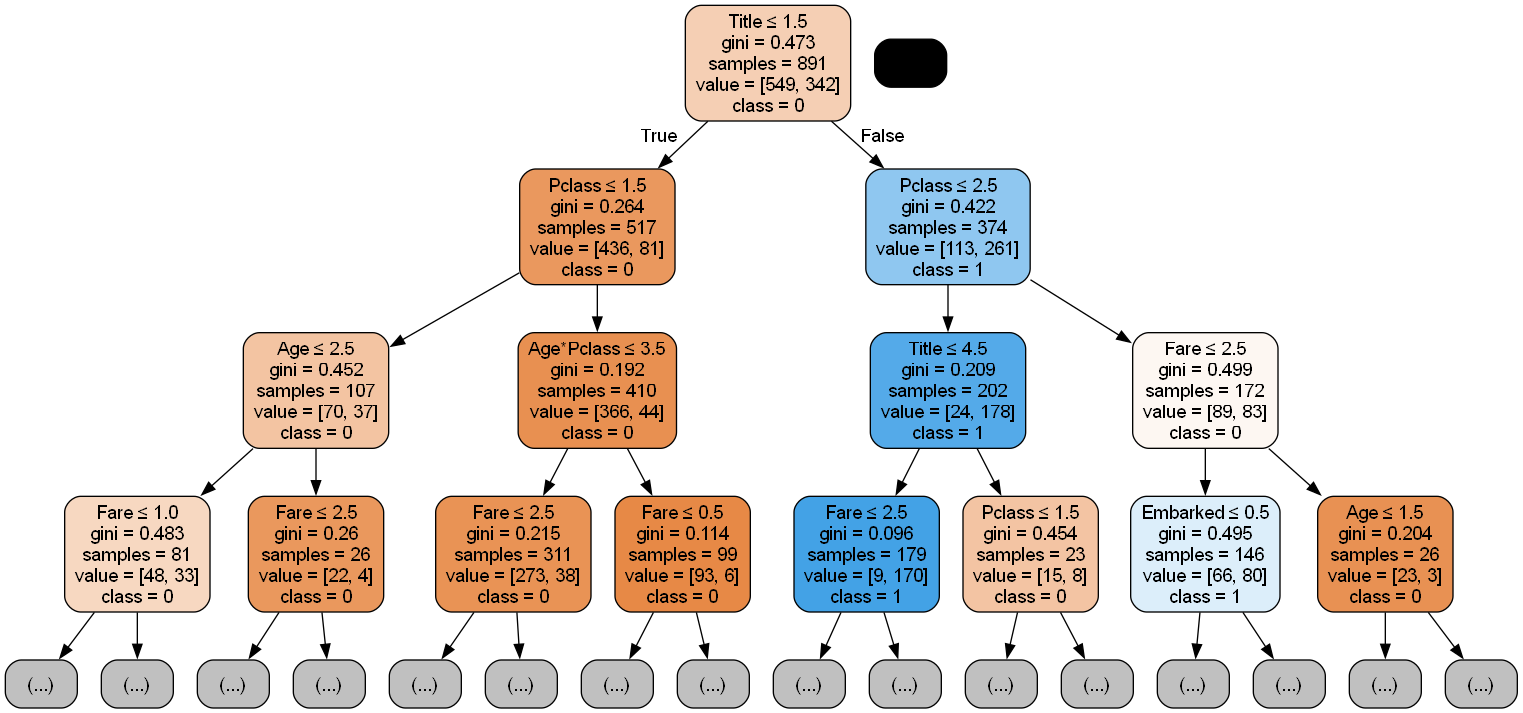

In [200]:
# 决策树可视化
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(decision_tree,out_file=None,feature_names=X_train.columns,class_names=['0','1'],max_depth=3,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [201]:
dot_data = tree.export_graphviz(decision_tree,out_file=None,feature_names=X_train.columns,
                                #class_names=['0','1']
                                filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("DTree.pdf")

train_df[(train_df['Age*Pclass']>2.5) & (train_df['Fare']<=1.5)&(train_df['Fare']>0.6)&(train_df['IsAlone']>0.5)&(train_df['Age']>0.5)& (train_df['Embarked']<=1.5)&(train_df['Embarked']>0.5)&(train_df['Fare']<=2.5)&(train_df['Age']<=1.5)&(train_df['Pclass']>1.5)&(train_df['Title']<=1.5)]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
584,0,3,0,1,1.0,1,1,1,3


随机森林

随机森林是一种用于分类、回归和其他任务的集成学习方法。它通过自助法（bootstrap）重采样技术，从原始训练样本集中有放回地重复随机抽取n个样本生成新的训练样本集合训练决策树，然后按以上步骤生成m棵决策树组成随机森林，新数据的分类结果按分类树投票多少形成的分数而定。其实质是对决策树算法的一种改进，将多个决策树合并在一起，每棵树的建立依赖于独立抽取的样本。模型置信度得分是目前评估的模型中最高的。

In [202]:
# 随机森林
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train,Y_train)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

86.64

(8)模型评估

我们现在可以对所有模型评估结果进行排名，以选择最适合我们问题的模型。虽然决策树和随机森林的得分相同，但我们选择使用随机森林，因为它纠正了决策树过度拟合训练集带来的缺陷

In [203]:
models = pd.DataFrame({
    'Model':['Support Vector Machines','KNN','Logistic Regression','Random Forest','Native Bayes','Perceptron','Decision Tree'],
    'Score':[acc_svc,acc_knn,acc_log,acc_random_forest,acc_gaussian,acc_perceptron,acc_decision_tree]
})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,86.64
6,Decision Tree,86.64
0,Support Vector Machines,82.83
1,KNN,82.83
2,Logistic Regression,81.37
5,Perceptron,79.35
4,Native Bayes,76.88


9 提交预测结果

In [1]:
submission=pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":Y_pred
})
submission.to_csv('./submission.csv',index=False)

NameError: name 'pd' is not defined